## 1. Reading the data

### Package imports

In [30]:
import pandas as pd
import numpy as np
import cv2
%matplotlib inline
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable
from model import DeepNet
from engine import test, train, test_class

### Reading the images present in the 'dataset/sans/16x' directory (dataset-1)

In [31]:
#read images
data=[]
chars = [i for i in range(48, 48+10)] + [i for i in range(65, 65+26)]
for i in chars:
    img = cv2.imread('dataset/sans/16px/%s.jpg' %chr(i))
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    (threshi, final_img) = cv2.threshold(img_gray, 0, 1, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    data.append(np.array(final_img, dtype=np.float32).flatten())


### Displaying the input images

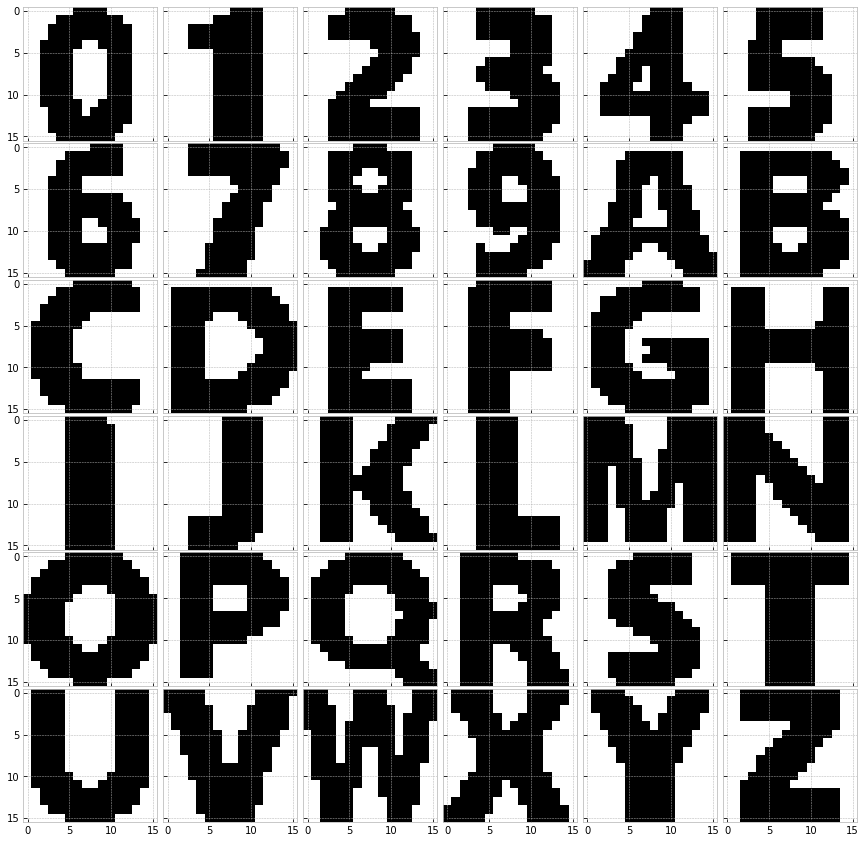

In [32]:
fig = plt.figure(figsize=(15, 15))
gs = fig.add_gridspec(6, 6, hspace=0.02, wspace=0.02)
axs = gs.subplots(sharex=True, sharey=True)
for i in range(36):
    axs[i//6, i%6].imshow(data[i].reshape(16, 16), 'gray')

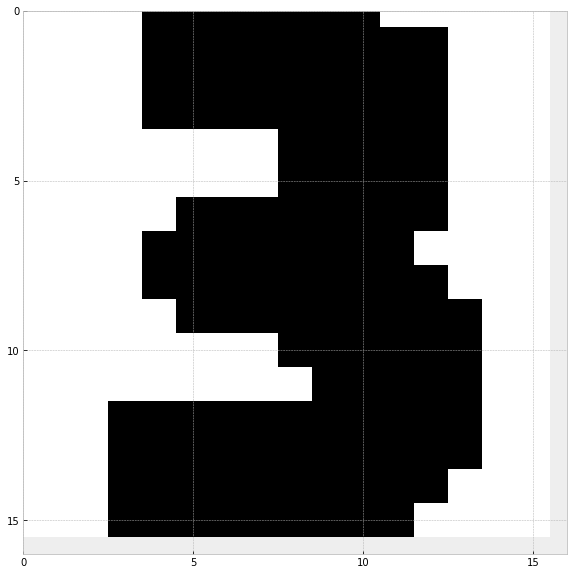

In [33]:
plt.style.use('bmh')
plt.figure(figsize=(10, 10))
plt.xticks(range(0, 16, 5))
plt.ylim(16, 0)
plt.xlim(0, 16)
plt.yticks(range(0, 16, 5))
plt.imshow(data[3].reshape(16, 16), 'gray')

In [34]:
x_data = Variable(torch.Tensor([data]))
y_data = Variable(torch.Tensor([data]))

In [35]:
# metrics for measuring the performance of the model
ffa = []
fh = []

for epochs in range(0, 1100, 100):
    model = DeepNet(layerSize=[256]+[256]*3+[256])
    criterion = torch.nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
    
    #Train the model with MSE loss criterion and Adam optimizer function
    train(data, data, model, criterion, optimizer, epochs)
    
    # Compute errors and predicted output
    pred, err = test(data=data, target=data, model=model)
    fh += [np.mean(err[0])]
    ffa += [np.mean(err[1])]
    print("Epochs {}: FFA {} and FH {}".format(epochs, ffa[-1], fh[-1]))

Epochs 0: FFA 0.4806143280799652 and FH 0.5165728456544254
Epochs 100: FFA 0.03686295549037417 and FH 0.9749788682962159
Epochs 200: FFA 0.01569913937942642 and FH 0.9921512436101784
Epochs 300: FFA 0.008405296983919182 and FH 0.9947365210841979
Epochs 400: FFA 0.009713732075578312 and FH 0.9940751537276342
Epochs 500: FFA 0.009168625074139736 and FH 0.9942380075430548
Epochs 600: FFA 0.009704988496242187 and FH 0.9951367078217336
Epochs 700: FFA 0.009219990207444545 and FH 0.9955396713238461
Epochs 800: FFA 0.008664642135804892 and FH 0.9952960690778043
Epochs 900: FFA 0.010182472843948777 and FH 0.9956437385313122
Epochs 1000: FFA 0.00846345576957663 and FH 0.995730864843388


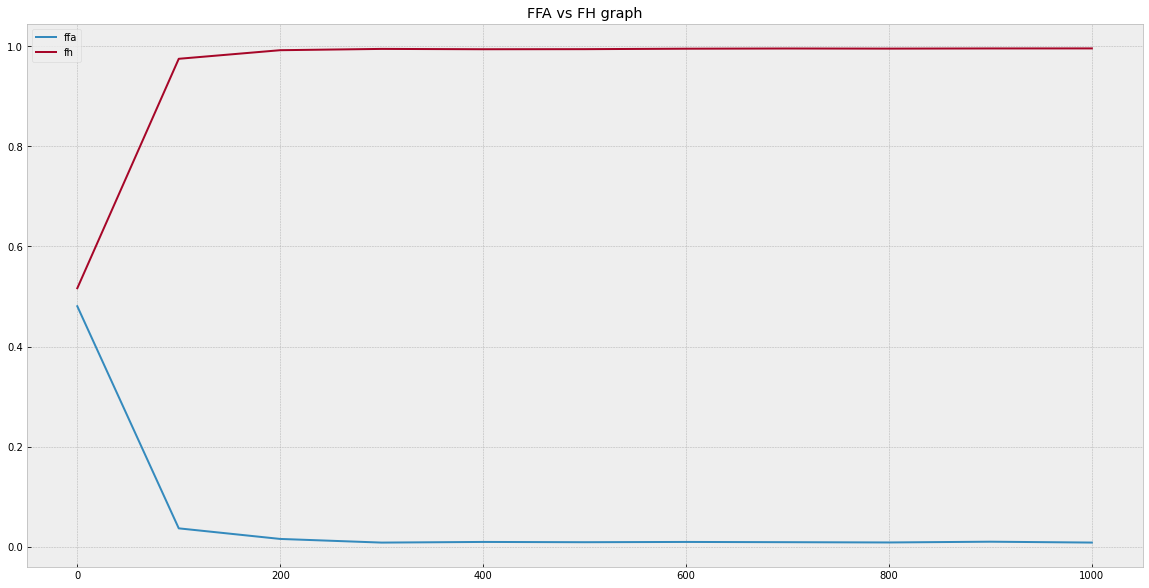

In [36]:
plt.figure(figsize=(20,10))
plt.plot(range(0, 1100, 100), ffa, label='ffa')
plt.plot(range(0, 1100, 100), fh, label='fh')

plt.title("FFA vs FH graph")
plt.legend()

### At 200 epochs we achieve FH and FFA scores of 0.99 and 0.13 respectively, which is why we have chosed to run the experiments with 200 epochs

In [37]:
model = DeepNet(layerSize=[256]+[256]*3+[256])
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
train(data, data, model, criterion, optimizer, 200)

[0.24962764978408813,
 0.24727460741996765,
 0.24349430203437805,
 0.23854504525661469,
 0.22960776090621948,
 0.2189202904701233,
 0.20456723868846893,
 0.19539491832256317,
 0.18928693234920502,
 0.19119633734226227,
 0.18915516138076782,
 0.1912655085325241,
 0.17984677851200104,
 0.17656832933425903,
 0.171462744474411,
 0.17408746480941772,
 0.1683088093996048,
 0.17042449116706848,
 0.16318678855895996,
 0.16499383747577667,
 0.15635789930820465,
 0.15636558830738068,
 0.1489538699388504,
 0.1495271474123001,
 0.14210093021392822,
 0.1454007923603058,
 0.1368316262960434,
 0.13778994977474213,
 0.13315552473068237,
 0.1345072090625763,
 0.12888078391551971,
 0.13159850239753723,
 0.12424209713935852,
 0.12594254314899445,
 0.11926945298910141,
 0.12087740004062653,
 0.1137133538722992,
 0.12378457188606262,
 0.10846754908561707,
 0.11434254050254822,
 0.10559507459402084,
 0.11138299107551575,
 0.1025465726852417,
 0.10988829284906387,
 0.09883254021406174,
 0.1058301106095314,
 

## 3. Testing the model

### Displaying the predicted images for running the model on dataset #1

In [38]:
fh_e, ffa_e = [], []

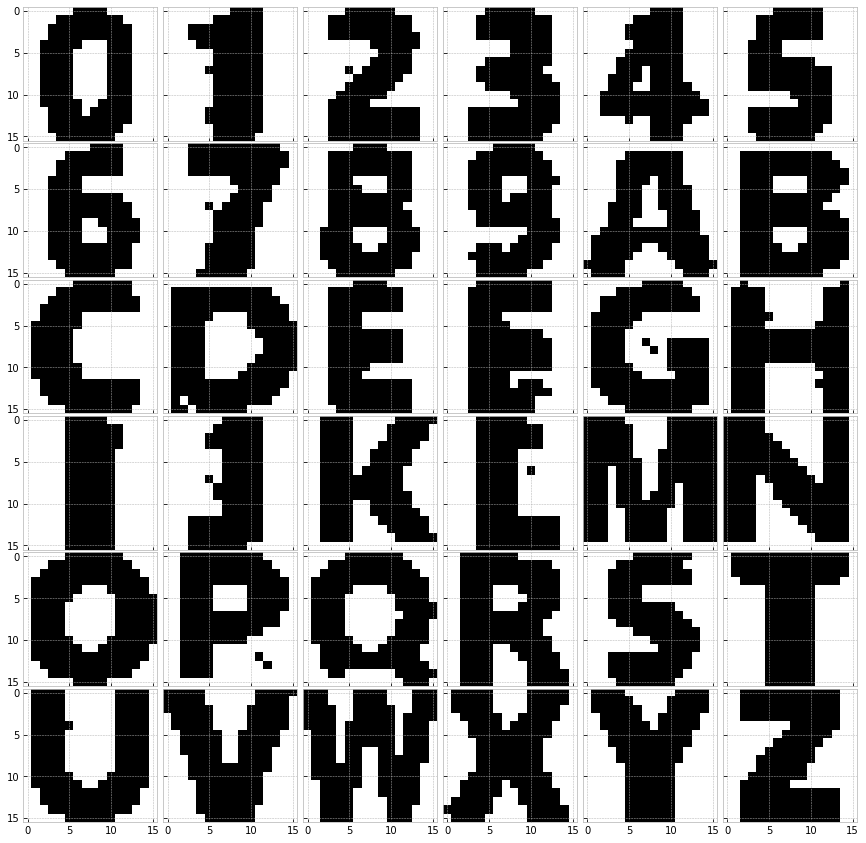

In [39]:
pred, err = test(data=data, target=data, model=model)
fig = plt.figure(figsize=(15, 15))
fh_e += err[0]
ffa_e += err[1]
gs = fig.add_gridspec(6, 6, hspace=0.02, wspace=0.02)
axs = gs.subplots(sharex=True, sharey=True)
for i in range(36):
    axs[i//6, i%6].imshow(pred[i], 'gray')    

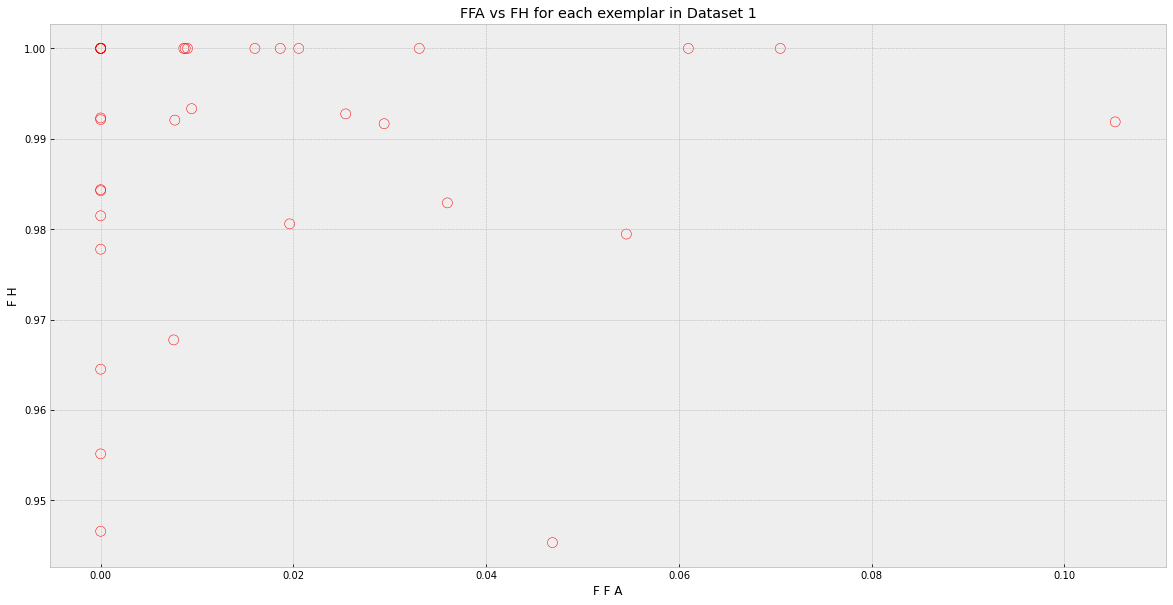

In [40]:
plt.figure(figsize=(20,10))
plt.scatter(ffa_e, fh_e, s=100, facecolors='none', edgecolors='r')
plt.title("FFA vs FH for each exemplar in Dataset 1")
plt.xlabel('F F A') 
plt.ylabel('F H') 
plt.show()

### reading the dataset #2

In [41]:
#read images
serif=[]
chars = [i for i in range(48, 48+10)] + [i for i in range(65, 65+26)]
for i in chars:
    img = cv2.imread('dataset/serif/16px/%s.jpg' %chr(i))
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    (threshi, final_img) = cv2.threshold(img_gray, 0, 1, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    serif.append(np.array(final_img, dtype=np.float32).flatten())


### Testing the model against dataset #2

[0.17087992221682063, 0.18314553246405743, 0.12050926847015322] [0.8708287895310796, 0.8383115864229018, 0.10756118516804516]


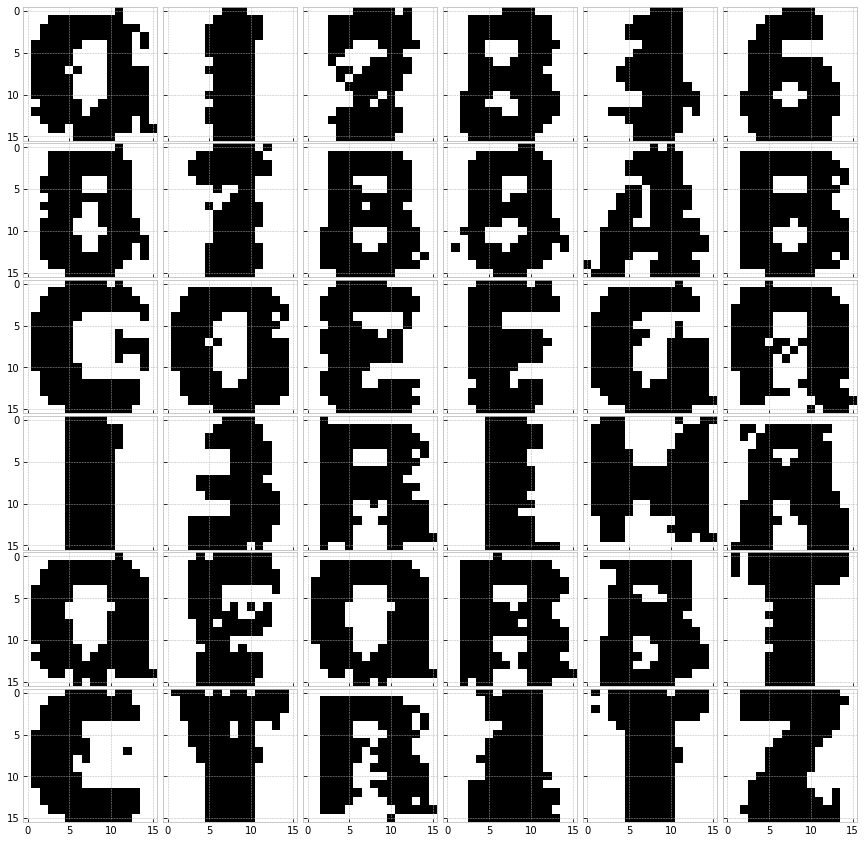

In [42]:
fh_e, ffa_e = [], []
pred, err = test(data=serif, target=data, model=model)

fh_e += err[0]
ffa_e += err[1]

fh = [np.median(err[0]), np.mean(err[0]), np.std(err[0])]
ffa = [np.median(err[1]), np.mean(err[1]), np.std(err[1])]
fig = plt.figure(figsize=(15, 15))
gs = fig.add_gridspec(6, 6, hspace=0.02, wspace=0.02)
axs = gs.subplots(sharex=True, sharey=True)
for i in range(36):
    axs[i//6, i%6].imshow(pred[i], 'gray')    
print(ffa, fh)

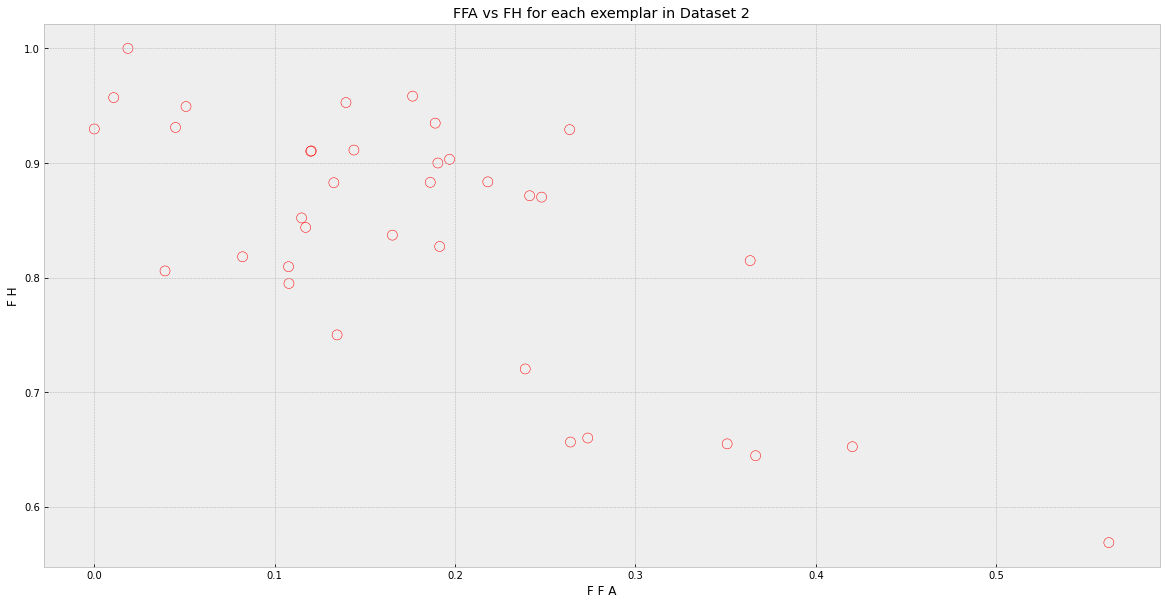

In [43]:
plt.figure(figsize=(20,10))
plt.scatter(ffa_e, fh_e, s=100, facecolors='none', edgecolors='r')
plt.title("FFA vs FH for each exemplar in Dataset 2")
plt.xlabel('F F A') 
plt.ylabel('F H') 
plt.show()

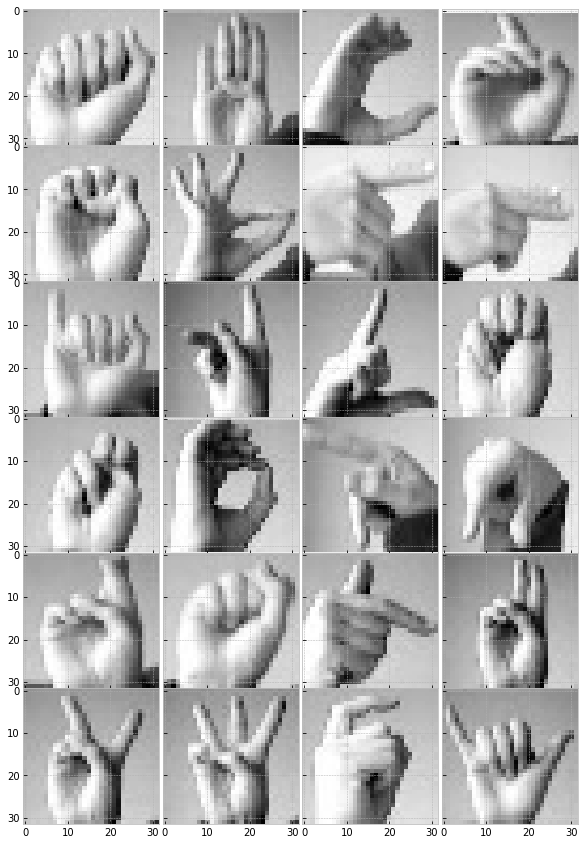

In [44]:
asl = []
asl_targets = []
ach = [i for i in range(65, 65+25)]
ach.remove(ord('J'))
for i in ach:
    img = cv2.imread('dataset/asl/32px/%s.jpg' %chr(i))
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    im = np.array(img_gray, dtype=np.float32).flatten()
    im = im/255
    asl.append(im)
    img = cv2.imread('dataset/sans/16px/%s.jpg' %chr(i))
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    (threshi, final_img) = cv2.threshold(img_gray, 0, 1, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    asl_targets.append(np.array(final_img, dtype=np.float32).flatten())
fig = plt.figure(figsize=(10, 15))
gs = fig.add_gridspec(6, 4, hspace=0, wspace=0)
axs = gs.subplots(sharex=True, sharey=True)
for i in range(24):
    axs[i//4, i%4].imshow(asl[i].reshape(32, 32), 'gray')

In [45]:
ffa = []
fh = []
for epochs in range(100, 1100, 100):
    model = DeepNet(layerSize=[1024]+[1024, 512, 256]+[256])
    criterion = torch.nn.MSELoss(size_average = False)
    optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
    train(asl, asl_targets, model, criterion, optimizer, epochs)
    pred, err = test(data=asl, target=asl_targets, model=model)
    ffa += [np.mean(err[0])]
    fh += [np.mean(err[1])]

/opt/anaconda3/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


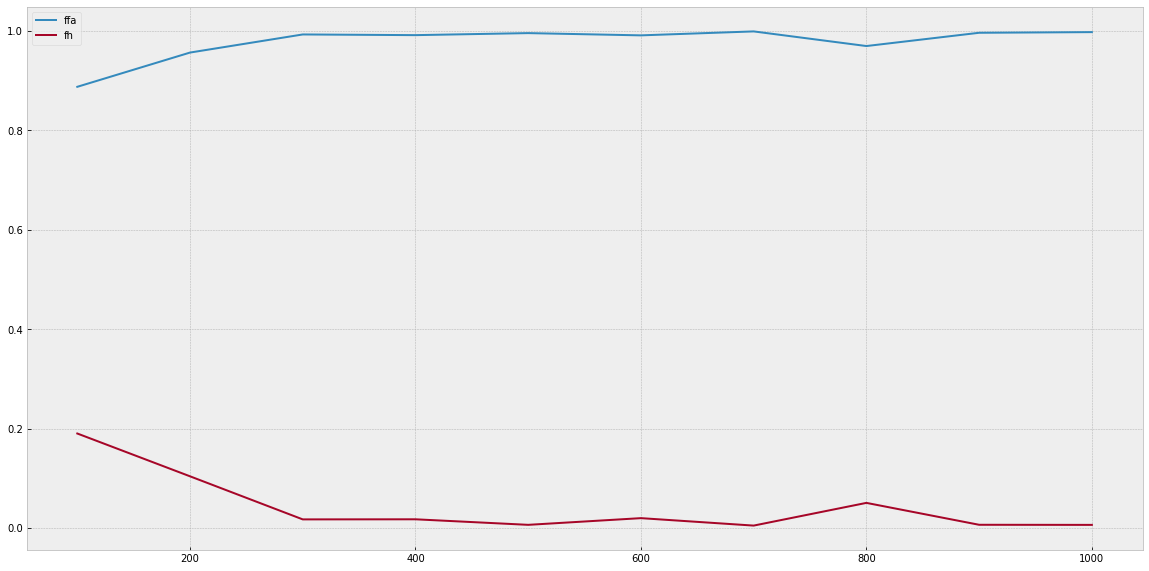

In [46]:
plt.figure(figsize=(20,10))
plt.plot(range(100, 1100, 100), ffa, label='ffa')
plt.plot(range(100, 1100, 100), fh, label='fh')
plt.legend()    

In [26]:
model = DeepNet(layerSize=[1024]+[1024, 512, 256]+[256])
criterion = torch.nn.MSELoss(size_average = False)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
train(asl, asl_targets, model, criterion, optimizer, 300)

[1536.8265380859375,
 1503.5782470703125,
 1420.705078125,
 1356.256591796875,
 1366.7994384765625,
 1290.0472412109375,
 1268.37353515625,
 1241.1195068359375,
 1226.8131103515625,
 1247.075927734375,
 1220.2545166015625,
 1218.031494140625,
 1222.721923828125,
 1211.9140625,
 1218.142578125,
 1214.195068359375,
 1211.9267578125,
 1206.8370361328125,
 1208.79931640625,
 1210.86767578125,
 1208.3975830078125,
 1200.9815673828125,
 1206.938232421875,
 1204.0726318359375,
 1202.708740234375,
 1206.129150390625,
 1200.9271240234375,
 1201.4754638671875,
 1200.1456298828125,
 1200.69677734375,
 1196.863525390625,
 1190.38037109375,
 1194.3082275390625,
 1201.230224609375,
 1192.1602783203125,
 1191.474609375,
 1186.961669921875,
 1192.300537109375,
 1180.9837646484375,
 1175.383544921875,
 1173.957275390625,
 1178.8599853515625,
 1165.186279296875,
 1158.2100830078125,
 1152.845458984375,
 1149.38037109375,
 1137.225341796875,
 1128.8350830078125,
 1114.5208740234375,
 1120.678466796875,
 

[1.0, 0.9959823682169997, 0.007936724933491958] [0.007337359610086883, 0.017134692237541122, 0.02442217925810895]


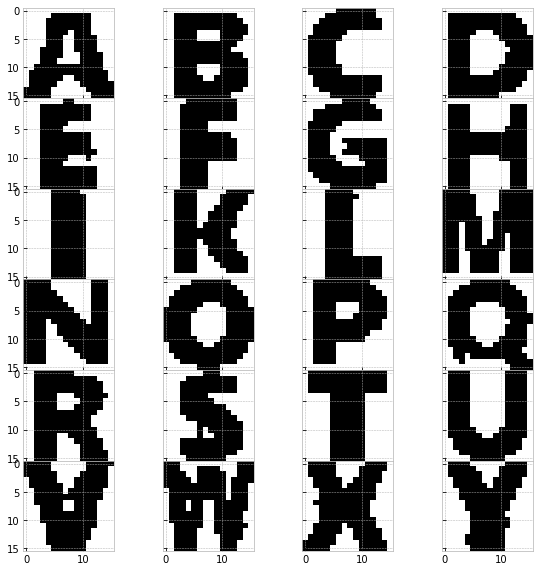

In [27]:
pred, err = test(data=asl, target=asl_targets, model=model)
ffa = [np.median(err[0]), np.mean(err[0]), np.std(err[0])]
fh = [np.median(err[1]), np.mean(err[1]), np.std(err[1])]
fig = plt.figure(figsize=(10, 10))
gs = fig.add_gridspec(6, 4, hspace=0, wspace=0)
axs = gs.subplots(sharex=True, sharey=True)
for i in range(24):
    axs[i//4, i%4].imshow(pred[i], 'gray')    
print(ffa, fh)

In [5]:
from sem import sem_data
model1 = DeepNet(layerSize=[256]+[150, 150, 150]+[81])
criterion1 = torch.nn.BCELoss()
optimizer1 = torch.optim.Adam(model1.parameters(), lr = 0.001)
model2 = DeepNet(layerSize=[81]+[150, 150, 150]+[256])
criterion2 = torch.nn.MSELoss(size_average = False)
optimizer2 = torch.optim.Adam(model2.parameters(), lr = 0.001)
sem_data = np.array(sem_data)
ffa = []
fh = []
loss = []
for epochs in range(100, 1100, 100):
    loss += train(data, sem_data, model1, criterion1, optimizer1, 100)
    features = test_class(data=data, target=sem_data, model=model1)
for epochs in range(100, 1100, 100):
    train(features, data, model2, criterion2, optimizer2, 100)
    pred, err = test(data=features, target=data, model=model2)
    ffa += [np.mean(err[0])]
    fh += [np.mean(err[1])]

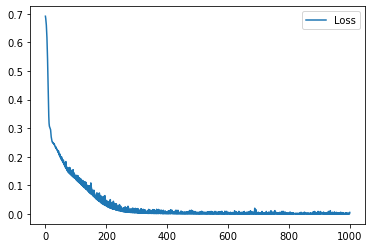

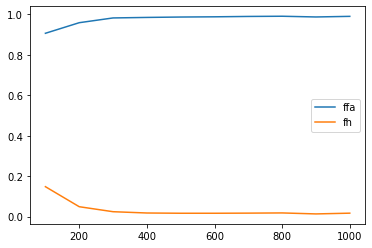

In [6]:
plt.figure()
plt.plot(range(1000), loss, label='Loss')
plt.legend()    
plt.figure()
plt.plot(range(100, 1100, 100), ffa, label='ffa')
plt.plot(range(100, 1100, 100), fh, label='fh')
plt.legend()    

In [44]:
model1 = DeepNet(layerSize=[256]+[256, 150, 81]+[81])
criterion1 = torch.nn.BCELoss()
optimizer1 = torch.optim.Adam(model1.parameters(), lr = 0.001)
model2 = DeepNet(layerSize=[81]+[81, 100, 128]+[256])
criterion2 = torch.nn.MSELoss(size_average = False)
optimizer2 = torch.optim.Adam(model2.parameters(), lr = 0.001)
sem_data = np.array(sem_data)
ffa = []
fh = []
loss = []
train(data, sem_data, model1, criterion1, optimizer1, 450)
features = test_class(data=data, target=sem_data, model=model1)
train(features, data, model2, criterion2, optimizer2, 450)
pred, err = test(data=features, target=data, model=model2)
ffa += [np.mean(err[0])]
fh += [np.mean(err[1])]

[0.8423228346456693, 0.8120454009511978, 0.14043030617484908] [0.19204210244033254, 0.21779734251499525, 0.15794779029611344]


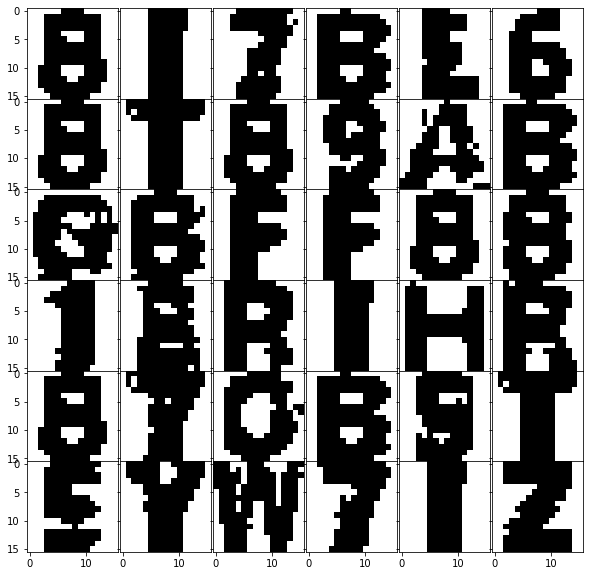

In [45]:
features = test_class(data=serif, target=sem_data, model=model1)
pred, err = test(data=features, target=data, model=model2)
ffa = [np.median(err[0]), np.mean(err[0]), np.std(err[0])]
fh = [np.median(err[1]), np.mean(err[1]), np.std(err[1])]
fig = plt.figure(figsize=(10, 10))
gs = fig.add_gridspec(6, 6, hspace=0, wspace=0)
axs = gs.subplots(sharex=True, sharey=True)
for i in range(36):
    axs[i//6, i%6].imshow(pred[i], 'gray')    
print(ffa, fh)